In [7]:
# Step 1: Import Libraries
%pip install tensorflow
%pip install matplotlib
%pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# The TensorFlow library is already imported as part of the `tensorflow.keras` imports.
# You can safely remove the placeholder code as it is redundant.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Step 2: Simulate Movement Data
time_steps = 200
x = np.linspace(0, 50, time_steps)
y = np.sin(x / 3) + np.random.normal(scale=0.2, size=time_steps)
df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('movement_data.csv', index=False)
df.head()

,x,y
0,0.000000,-0.331616
1,0.251256,0.242352
2,0.502513,0.108831
3,0.753769,0.101420
4,1.005025,0.281358


In [9]:
# Step 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['x', 'y']])
scaled_df = pd.DataFrame(scaled_data, columns=['x', 'y'])

In [10]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x_seq = data.iloc[i:i+seq_length][['x', 'y']].values
        y_seq = data.iloc[i+seq_length][['x', 'y']].values
        xs.append(x_seq)
        ys.append(y_seq)
    return np.array(xs), np.array(ys)


In [11]:
seq_len = 5
X, y = create_sequences(scaled_df, seq_len)

In [12]:
# Step 5: Split Dataset
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
# Step 6: Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_len, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17152     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17282 (67.51 KB)
Trainable params: 17282 (67.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50

5/5 [==============================] - 3s 88ms/step - loss: 0.2746 - val_loss: 0.5665
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 0.2198 - val_loss: 0.4545
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.1704 - val_loss: 0.3439
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1208 - val_loss: 0.2317
Epoch 5/50
5/5 [=========

In [16]:

model.save("model/lstm_model.keras")


2/2 [==============================] - 0s 0s/step
Mean Squared Error: 0.01124374053050718


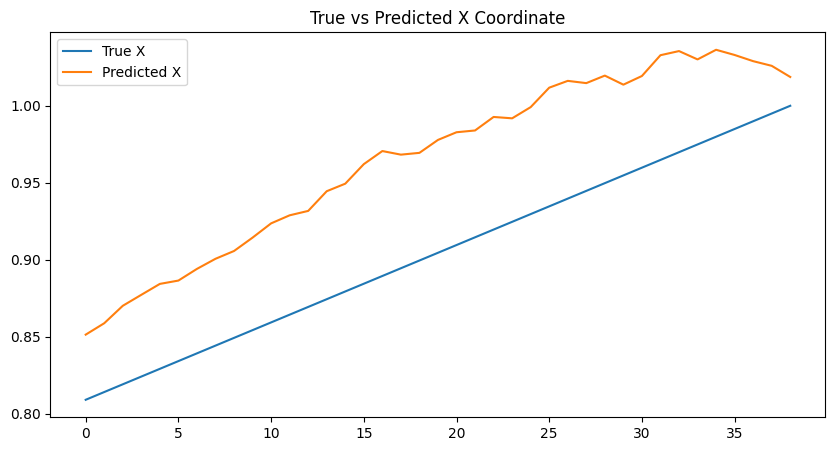

In [15]:
# Step 7: Evaluate and Plot
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10,5))
plt.plot(y_test[:, 0], label='True X')
plt.plot(predictions[:, 0], label='Predicted X')
plt.legend()
plt.title('True vs Predicted X Coordinate')
plt.show()